In [44]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/vehicle_larceny_loc.csv")
df.head()

,ADDR_PCT_CD,BORO_NM,Latitude,Longitude,CMPLANT_DT
0,1,MANHATTAN,40.717680,-74.015769,2021-09-24 08:00:00
1,44,BRONX,40.836559,-73.914274,2021-09-23 19:00:00
2,32,MANHATTAN,40.829882,-73.936758,2021-09-28 22:45:00
3,63,BROOKLYN,40.620871,-73.903697,2021-09-30 02:30:00
4,110,QUEENS,40.745162,-73.887837,2021-09-27 00:15:00


In [3]:
df.shape

(7477, 5)

In [4]:
df.columns

Index(['ADDR_PCT_CD', 'BORO_NM', 'Latitude', 'Longitude', 'CMPLANT_DT'], dtype='object')

In [5]:
df.describe()

,ADDR_PCT_CD,Latitude,Longitude
count,7477.000000,7477.000000,7477.000000
mean,67.299184,40.748183,-73.905370
std,32.202986,0.084774,0.069986
min,1.000000,40.503136,-74.250114
25%,43.000000,40.679580,-73.948251
50%,67.000000,40.742238,-73.904244
75%,102.000000,40.828350,-73.862082
max,123.000000,40.912723,-73.704437


In [6]:
df.isnull().sum()

ADDR_PCT_CD    0
BORO_NM        0
Latitude       0
Longitude      0
CMPLANT_DT     0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(7470, 5)

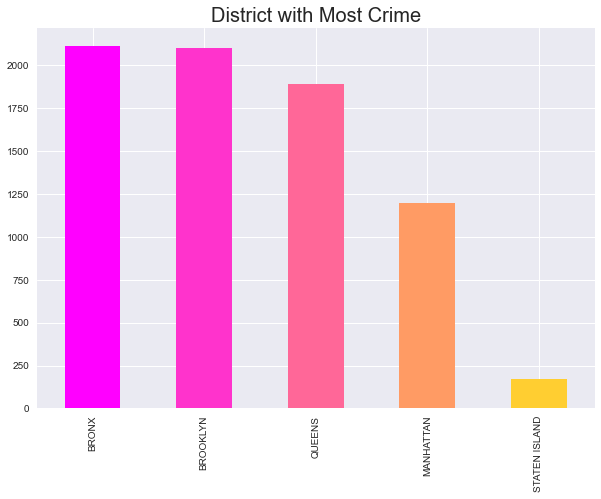

In [9]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df['BORO_NM'].value_counts().plot.bar(color = color, figsize = (10, 7))

plt.title('District with Most Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [21]:
df['CMPLANT_DT'] = pd.to_datetime(df['CMPLANT_DT'])
df['Date'] = pd.to_datetime(df['CMPLANT_DT'].dt.date)
df['Day'] = df['CMPLANT_DT'].dt.day
df['DayOfWeek'] = df['CMPLANT_DT'].dt.day_name()
df['Month'] = df['CMPLANT_DT'].dt.strftime('%b')
df['Year'] = df['CMPLANT_DT'].dt.year
df['Hour'] = df['CMPLANT_DT'].dt.hour

In [22]:
df.head()

,ADDR_PCT_CD,BORO_NM,Latitude,Longitude,CMPLANT_DT,Date,Day,DayOfWeek,Month,Year,Hour
0,1,MANHATTAN,40.717680,-74.015769,2021-09-24 08:00:00,2021-09-24,24,Friday,Sep,2021,8
1,44,BRONX,40.836559,-73.914274,2021-09-23 19:00:00,2021-09-23,23,Thursday,Sep,2021,19
2,32,MANHATTAN,40.829882,-73.936758,2021-09-28 22:45:00,2021-09-28,28,Tuesday,Sep,2021,22
3,63,BROOKLYN,40.620871,-73.903697,2021-09-30 02:30:00,2021-09-30,30,Thursday,Sep,2021,2
4,110,QUEENS,40.745162,-73.887837,2021-09-27 00:15:00,2021-09-27,27,Monday,Sep,2021,0


In [25]:
df['Year'].unique()

array([2021, 2020, 2012, 2015, 2019], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


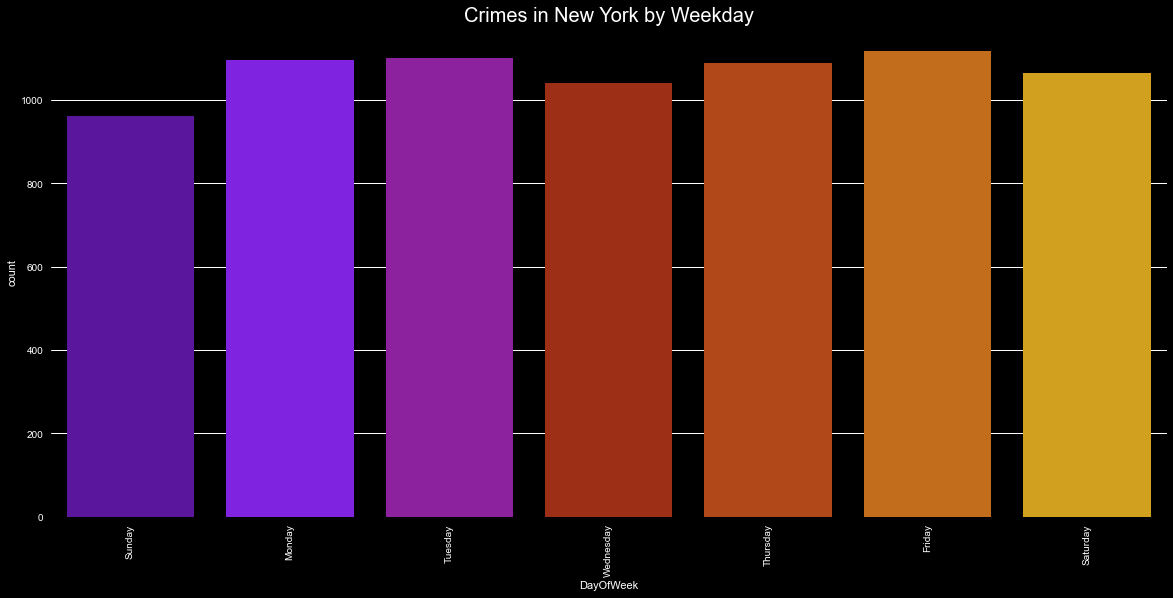

In [32]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['DayOfWeek'], palette = 'gnuplot', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

plt.title('Crimes in New York by Weekday', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

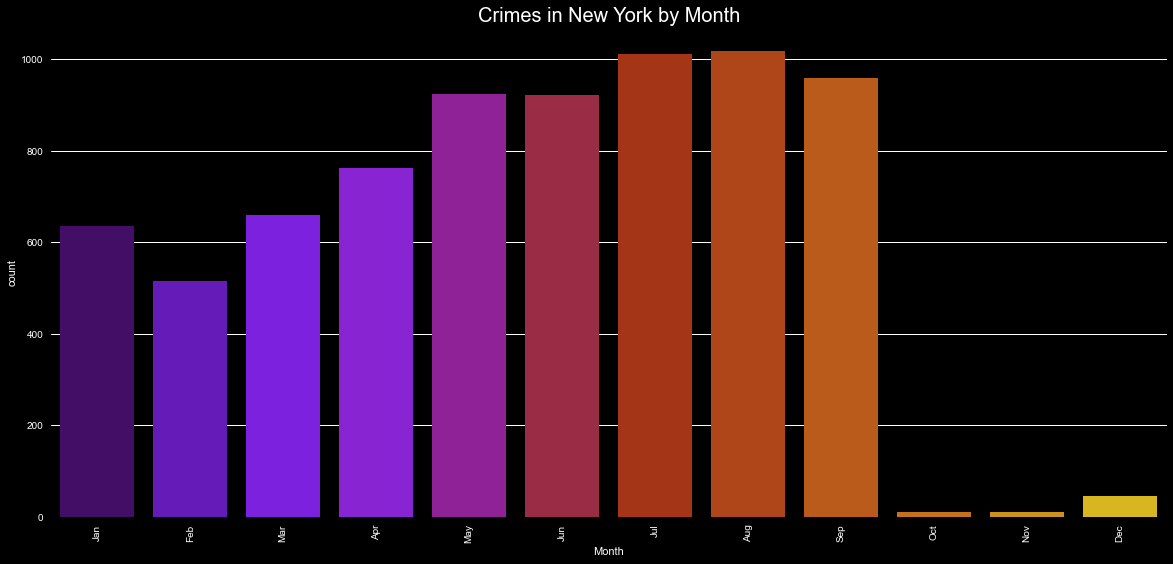

In [35]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Month'], palette = 'gnuplot', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title('Crimes in New York by Month', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

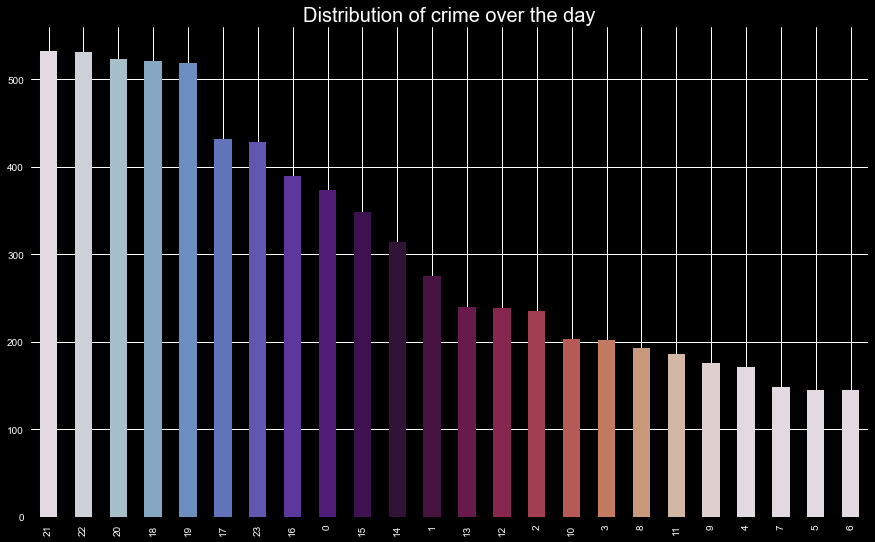

In [40]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Hour'].value_counts().head(24).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [42]:
df['BORO_NM'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

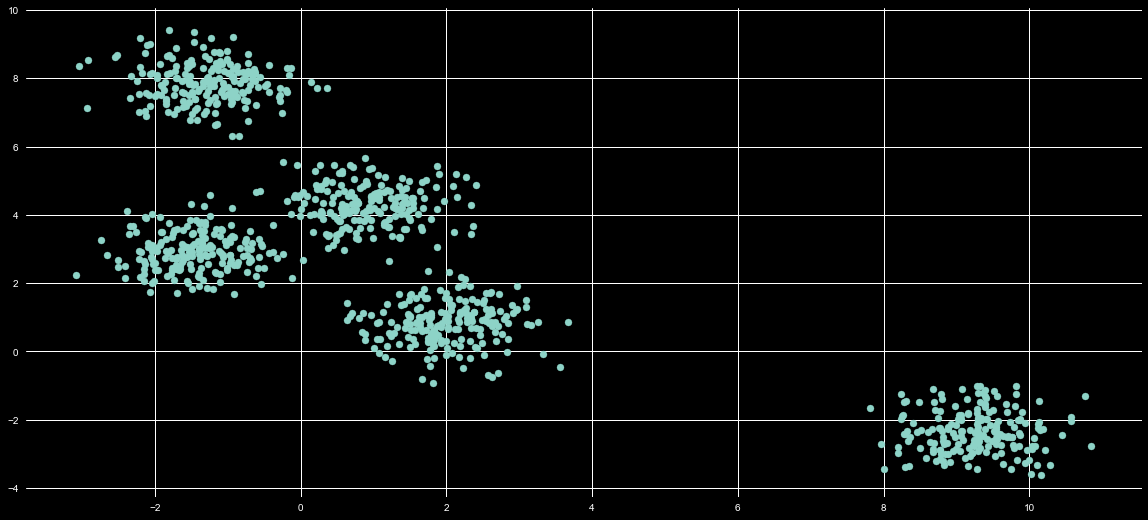

In [52]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Text(0, 0.5, 'WCSS')

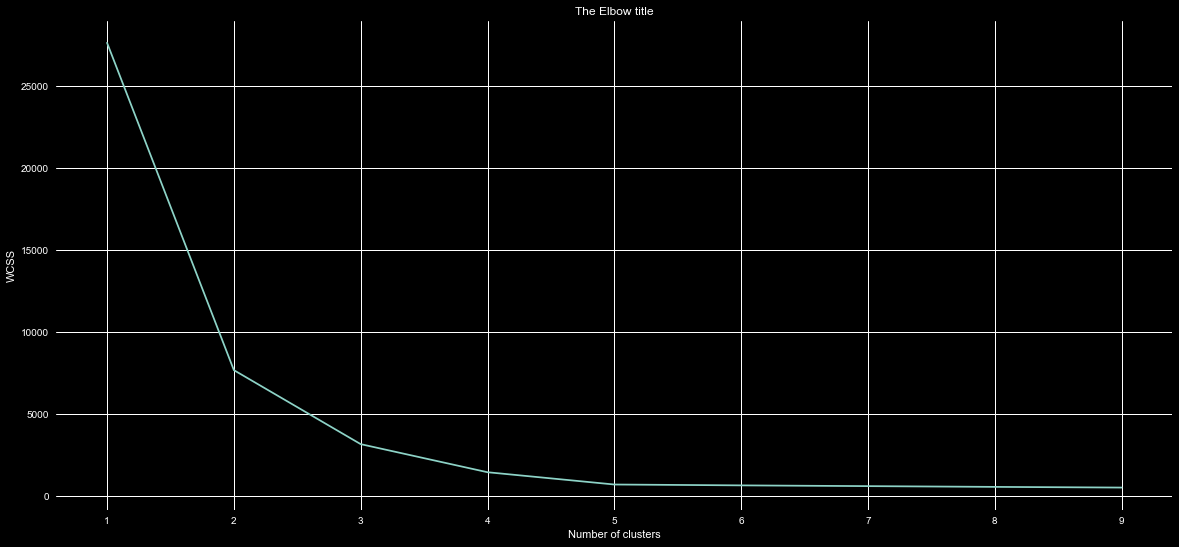

In [59]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#Categorizing the data using the optimum number of clusters (6) we determined in the last step. 
#k-means++ ensures that you get don’t fall into the random initialization trap.

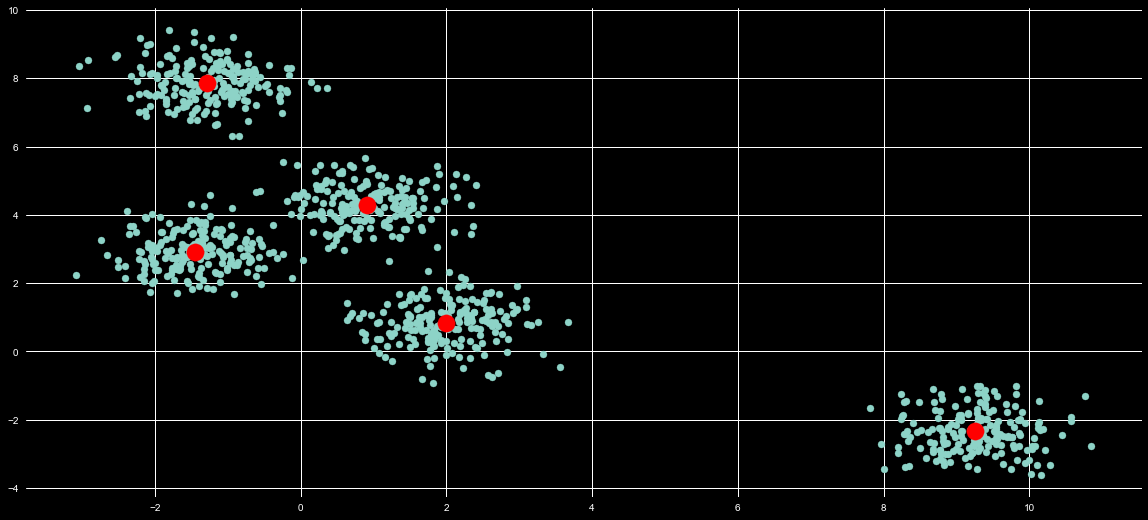

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()